### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip3 install tensorflow==2.0 --quiet

In [0]:
import tensorflow as tf


In [6]:
tf.__version__

'2.0.0'

### Collect Data

In [8]:
import keras

Using TensorFlow backend.


In [9]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [12]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

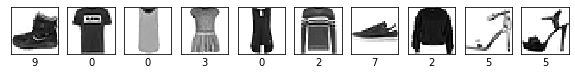

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(trainY[i].argmax())
    plt.imshow(trainX[i],cmap='binary')

In [0]:
from matplotlib import pyplot

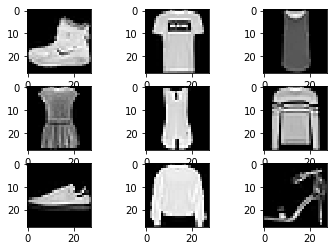

In [17]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2015.2608 - accuracy: 0.7402 - val_loss: 1043.8612 - val_accuracy: 0.8054
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1622.4182 - accuracy: 0.7774 - val_loss: 1567.9481 - val_accuracy: 0.7454
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 1571.8194 - accuracy: 0.7834 - val_loss: 1951.6165 - val_accuracy: 0.7409
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1509.3857 - accuracy: 0.7890 - val_loss: 1570.0251 - val_accuracy: 0.7684
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1517.3502 - accuracy: 0.7901 - val_loss: 1199.3512 - val_accuracy: 0.8130
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1466.8809 - accuracy: 0.7949 - val_loss: 2272.7656 - val_accuracy: 0.7411
Epoch 7/10
60000/600

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization()) #Batch Normalization

#Add Dense Layer which provides 10 Outputs
model_1.add(tf.keras.layers.Dense(10, activation='softmax')) 

#Comile the model
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [22]:
model_1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5994 - accuracy: 0.7949 - val_loss: 0.5125 - val_accuracy: 0.8216
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4901 - accuracy: 0.8302 - val_loss: 0.4903 - val_accuracy: 0.8297
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4692 - accuracy: 0.8384 - val_loss: 0.4751 - val_accuracy: 0.8349
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4574 - accuracy: 0.8425 - val_loss: 0.4779 - val_accuracy: 0.8373
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4486 - accuracy: 0.8448 - val_loss: 0.4841 - val_accuracy: 0.8373
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4432 - accuracy: 0.8476 - val_loss: 0.4686 - val_accuracy: 0.8402
Epoch 7/10
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model_1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model_1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4175 - accuracy: 0.8548 - val_loss: 0.4567 - val_accuracy: 0.8441
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4156 - accuracy: 0.8552 - val_loss: 0.4615 - val_accuracy: 0.8431
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4137 - accuracy: 0.8571 - val_loss: 0.4562 - val_accuracy: 0.8425
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4165 - accuracy: 0.8555 - val_loss: 0.4591 - val_accuracy: 0.8426
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4183 - accuracy: 0.8562 - val_loss: 0.4601 - val_accuracy: 0.8410
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4151 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.8426
Epoch 7/10
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model_2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model_2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [31]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [32]:
model_2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 2.2414 - accuracy: 0.2712 - val_loss: 2.1208 - val_accuracy: 0.3642
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 1.9128 - accuracy: 0.3659 - val_loss: 1.6856 - val_accuracy: 0.4043
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.5314 - accuracy: 0.4523 - val_loss: 1.3865 - val_accuracy: 0.5102
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.3077 - accuracy: 0.5590 - val_loss: 1.2091 - val_accuracy: 0.5985
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 1.1551 - accuracy: 0.6083 - val_loss: 1.0719 - val_accuracy: 0.6420
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 1.0347 - accuracy: 0.6435 - val_loss: 0.9657 - val_accuracy: 0.6800
Epoch 7/10
60000/60000 [=============================